# Week3 授業課題　信用情報の分析

# 【問題1】コンペティション内容の把握


### ・Home Creditはどのような企業？
1997年にチェコ共和国で設立され、オランダに本社を置く国際的なノンバンク金融機関。
主に信用履歴がほとんどまたはまったくない人々への貸付に注力しています。



### ・このコンペティションでは何を予測する？


多くの人々は、信用履歴が不十分または存在しないため、融資を受けるのに苦労しています。
Home Creditは銀行のない人々の金融包摂の拡大に努めており、この十分なサービスを受けていない人々が確実に融資を受けられるようにするため、電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測しています。
統計的手法や機械学習手法を使用してこれらの予測を行い、返済可能なクライアントが拒否されないようにし、クライアントが成功するための元本、満期、返済カレンダーがローンに与えられるようにします。
予測された確率と観測されたターゲットの間のROC曲線の下の領域で評価されます。

### ・それを予測することで企業が得られるメリットは何？

In [2]:
今まで弾かれていた返済可能なクライアントがHome Creditの顧客になる可能性が高くなる

SyntaxError: invalid syntax (<ipython-input-2-714699bfe45d>, line 1)

# 【問題2】データの概観の把握

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
df = pd.read_csv('/Users/shinoda/diveintocode-ml/application_train.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### ・.head()、.info()、describe()などを使う

In [6]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### ・欠損値の有無を見る

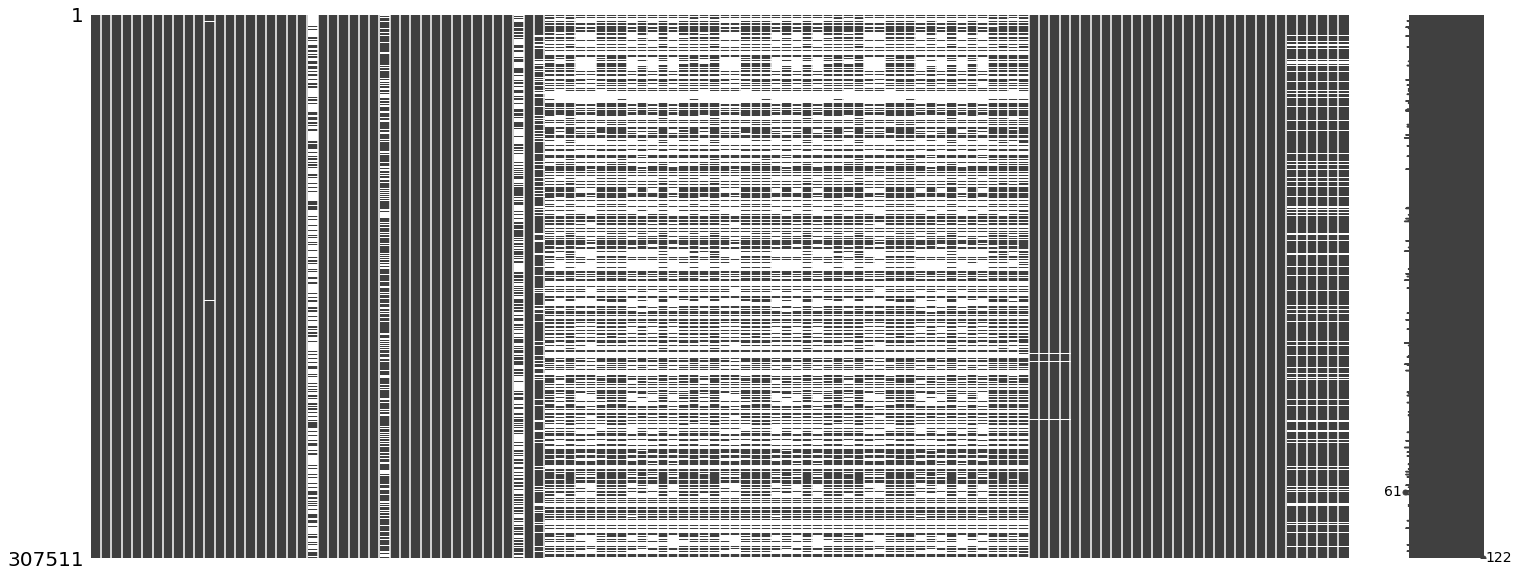

In [9]:
msno.matrix(df)

In [10]:
pd.set_option('display.max_rows', 67)
#pd.set_option('display.max_columns', 50)
df_view = df.isnull().sum()[df.isnull().sum()>0].sort_values()
df_view


DAYS_LAST_PHONE_CHANGE               1
CNT_FAM_MEMBERS                      2
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
EXT_SOURCE_2                       660
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
NAME_TYPE_SUITE                   1292
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
EXT_SOURCE_3                     60965
OCCUPATION_TYPE                  96391
EMERGENCYSTATE_MODE             145755
TOTALAREA_MODE                  148431
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE           

In [11]:
df.isnull().sum()[df.isnull().sum()>0].sort_values().values

array([     1,      2,     12,    278,    660,   1021,   1021,   1021,
         1021,   1292,  41519,  41519,  41519,  41519,  41519,  41519,
        60965,  96391, 145755, 148431, 150007, 150007, 150007, 153020,
       153020, 153020, 154297, 154350, 154350, 154350, 154828, 154828,
       154828, 156061, 156061, 156061, 156341, 163891, 163891, 163891,
       169682, 169682, 169682, 173378, 179943, 179943, 179943, 182590,
       182590, 182590, 202929, 204488, 204488, 204488, 208642, 208642,
       208642, 210199, 210199, 210199, 210295, 213514, 213514, 213514,
       214865, 214865, 214865])

### ・クラスごとのデータ数をグラフに出す

In [12]:
pd.set_option('display.max_rows', 122)
df.count()

SK_ID_CURR                      307511
TARGET                          307511
NAME_CONTRACT_TYPE              307511
CODE_GENDER                     307511
FLAG_OWN_CAR                    307511
FLAG_OWN_REALTY                 307511
CNT_CHILDREN                    307511
AMT_INCOME_TOTAL                307511
AMT_CREDIT                      307511
AMT_ANNUITY                     307499
AMT_GOODS_PRICE                 307233
NAME_TYPE_SUITE                 306219
NAME_INCOME_TYPE                307511
NAME_EDUCATION_TYPE             307511
NAME_FAMILY_STATUS              307511
NAME_HOUSING_TYPE               307511
REGION_POPULATION_RELATIVE      307511
DAYS_BIRTH                      307511
DAYS_EMPLOYED                   307511
DAYS_REGISTRATION               307511
DAYS_ID_PUBLISH                 307511
OWN_CAR_AGE                     104582
FLAG_MOBIL                      307511
FLAG_EMP_PHONE                  307511
FLAG_WORK_PHONE                 307511
FLAG_CONT_MOBILE         

In [13]:
df_1 = df[df['TARGET'] == 1]
df_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [14]:
df_0 = df[df['TARGET'] == 0]
df_0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


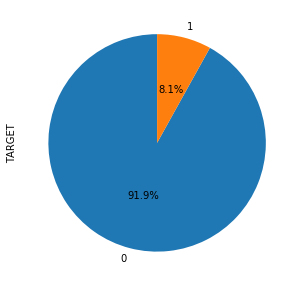

In [15]:
df['TARGET'].value_counts().plot.pie(figsize=(5,5),startangle=90,autopct='%1.1f%%',pctdistance=0.5)

#  【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

In [16]:
・どの特徴量がtargetに大きく関係あるかがわからない


SyntaxError: invalid character in identifier (<ipython-input-16-7939192559b9>, line 1)

# 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。

仮説1)年収が高い人の方が返済してそう。

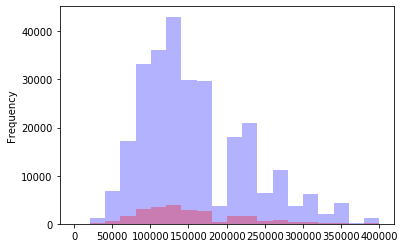

In [17]:
df["AMT_INCOME_TOTAL"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="b" ,range=(1000,400000))
df["AMT_INCOME_TOTAL"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, color="r",range=(1000,400000))

In [18]:
ターゲットの分布が不均衡なため、正規化する

SyntaxError: invalid character in identifier (<ipython-input-18-dc12644d4ab3>, line 1)

/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


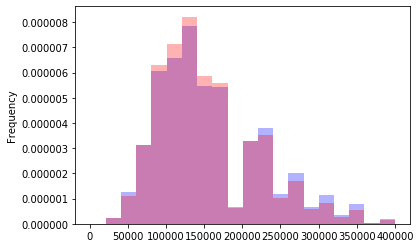

In [19]:
df["AMT_INCOME_TOTAL"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="b" ,normed=True,range=(1000,400000))
df["AMT_INCOME_TOTAL"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, color="r",normed=True,range=(1000,400000))
plt.show()

In [20]:
考察：年収の高低は関係なさそうである

SyntaxError: invalid character in identifier (<ipython-input-20-edf5b9cb2977>, line 1)

仮説2) 返済が滞る人はローンを頻繁に組んでいそう。 この仮説を検証するため、ターゲットラベルごとに、OBS_30_CNT_SOCIAL_CIRCLEとDEF_30_CNT_SOCIAL_CIRCLEの統計量を確認する。

In [21]:
df["OBS_30_CNT_SOCIAL_CIRCLE"][df["TARGET"]==0].describe()

count    281701.000000
mean          1.415742
std           2.402858
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [22]:
df["OBS_30_CNT_SOCIAL_CIRCLE"][df["TARGET"]==1].describe()

count    24789.000000
mean         1.496147
std          2.378438
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


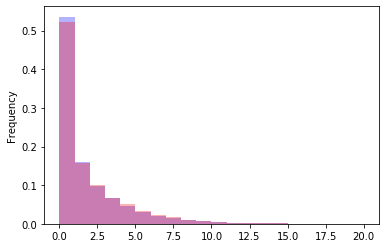

In [23]:
df["OBS_30_CNT_SOCIAL_CIRCLE"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 
                                                              ,color="b" ,normed=True,range=(0,20))
df["OBS_30_CNT_SOCIAL_CIRCLE"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, 
                                                              color="r",normed=True,range=(0,20))

/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


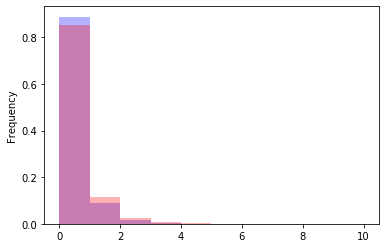

In [24]:
df["DEF_30_CNT_SOCIAL_CIRCLE"][df["TARGET"]==0].plot.hist(bins=10, alpha = 0.3 
                                                              ,color="b" ,normed=True,range=(0,10))
df["DEF_30_CNT_SOCIAL_CIRCLE"][df["TARGET"]==1].plot.hist(bins=10, alpha = 0.3, 
                                                              color="r",normed=True,range=(0,10))

In [25]:
df.corr()["DEF_30_CNT_SOCIAL_CIRCLE"].sort_values(ascending =False) #このカラム（DEF_30_CNT_SOCIAL_CIRCLE）と 相関の高いカラムを確認

DEF_30_CNT_SOCIAL_CIRCLE        1.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.860517
OBS_60_CNT_SOCIAL_CIRCLE        0.331571
OBS_30_CNT_SOCIAL_CIRCLE        0.329338
TARGET                          0.032248
AMT_REQ_CREDIT_BUREAU_YEAR      0.018590
DAYS_EMPLOYED                   0.016717
REGION_RATING_CLIENT            0.015394
REGION_RATING_CLIENT_W_CITY     0.013935
FLAG_DOCUMENT_3                 0.012654
OWN_CAR_AGE                     0.008868
FLAG_DOCUMENT_6                 0.007707
REG_CITY_NOT_LIVE_CITY          0.007167
REGION_POPULATION_RELATIVE      0.006329
NONLIVINGAPARTMENTS_MODE        0.005434
FLAG_CONT_MOBILE                0.004814
NONLIVINGAPARTMENTS_MEDI        0.004370
NONLIVINGAPARTMENTS_AVG         0.003857
DAYS_REGISTRATION               0.003361
DAYS_ID_PUBLISH                 0.002738
FLAG_DOCUMENT_2                 0.002395
FLAG_MOBIL                      0.000580
REG_CITY_NOT_WORK_CITY          0.000493
DAYS_LAST_PHONE_CHANGE          0.000423
AMT_REQ_CREDIT_B

仮説3)  ローン返済額が多い人ほど、返済滞る？

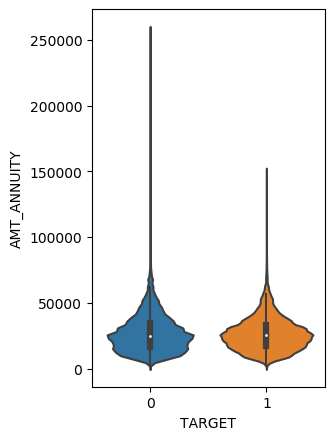

In [26]:
size=(3,5)
plt.figure(figsize=size,dpi=100)
sns.violinplot("TARGET","AMT_ANNUITY" , data = df)

考察：分布が変わらないことから関係ないと考えられる

In [27]:
df[["AMT_ANNUITY","AMT_CREDIT"]].corr()

,AMT_ANNUITY,AMT_CREDIT
AMT_ANNUITY,1.000000,0.770138
AMT_CREDIT,0.770138,1.000000


Text(0, 0.5, 'AMT_ANNUITY')

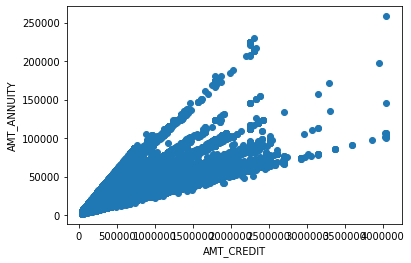

In [28]:
plt.scatter(df["AMT_CREDIT"], df["AMT_ANNUITY"])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')

考察４)外れ値の確認

In [29]:
df["age"] = abs(df["DAYS_BIRTH"]/365).round().astype(int)

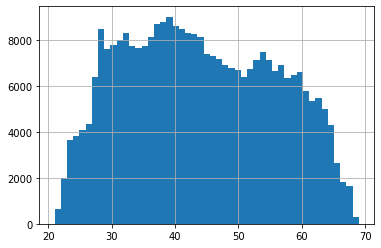

In [30]:
df["age"].hist(bins = df["age"].nunique())

In [31]:
df["regist_year"]= abs(df["DAYS_REGISTRATION"]/365).round().astype(int)

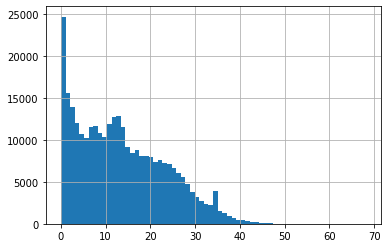

In [32]:
df["regist_year"].hist(bins=df["regist_year"].nunique())

In [33]:
len(df[df['regist_year']==63])

2

In [34]:
df['regist_year'].max()

68

考察５）欠損値の処理

In [35]:
missing_df = pd.DataFrame(df.isnull().sum()/len(df))
missing_50 = missing_df[missing_df.iloc[:,0]>=0.5]
missing_50.shape

(41, 1)

※41個の特徴量が50%以上nanなので、一つずつ精査する必要がある。 実際にこのようなデータに直面した時はそもそもなぜNaNになっているか、そしてそれを踏まえた上で、 除去するしないを考える。注意点としてはNanだからといって必ずしも除外するとは限らないことである。 例えば、ユーザーが手打ちで適当に入力するデータの場合（記入が必須でない記入欄のデータは当然Nanになる）、 それを除外し集計、モデリングを実施してしまうと、実際の想定ユーザーと異なるデータでモデリングすることになる。 そういった場合を考え、NanをNanのまま扱えるモデルを選定したり、Nanには別のラベルを付与するなどする。

In [36]:
df_0[df_0['CODE_GENDER'] =='F']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [37]:
df.index

RangeIndex(start=0, stop=307511, step=1)

In [38]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'age', 'regist_year'],
      dtype='object', length=124)

In [39]:
corr = df.corr()
pd.set_option('display.max_columns', 123)
display(corr)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,regist_year
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.001818,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000082,0.002342,0.000222,0.001556,-0.002070,0.001551,0.005900,-0.001463,0.004862,-0.002879,0.004851,0.003083,0.001465,0.003119,0.001770,-0.002575,0.003042,0.001961,-0.001411,0.001890,0.005245,-0.001058,0.005017,-0.002844,0.004386,0.002081,0.001548,0.003589,0.002156,-0.001923,0.001920,0.001988,-0.001647,0.001366,0.005777,-0.001036,0.005067,-0.002583,0.004588,0.002837,0.001699,0.003272,0.002205,-0.003020,0.002440,0.002288,-0.001409,-0.000082,-0.001423,0.001187,-0.000858,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659,0.001483,0.001024
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.037612,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.155317,-0.160472,-0.178919,-0.029498,-0.022746,-0.009728,-0.022149,-0.018550,-0.034199,-0.019172,-0.044003,-0.033614,-0.010885,-0.025031,-0.032997,-0.003176,-0.013578,-0.027284,-0.019952,-0.009036,-0.022068,-0.016340,-0.032131,-0.017387,-0.043226,-0.032698,-0.010174,-0.023393,-0.030685,-0.001557,-0.012711,-0.029184,-0.022081,-0.009993,-0.022326,-0.018573,-0.033863,-0.019025,-0.043768,-0.033394,-0.011256,-0.024621,-0.032739,-0.002757,-0.013337,-0.032596,0.009131,0.032248,0.009022,0.031276,0.055218,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930,-0.0

In [40]:

df[['TARGET', 'AMT_INCOME_TOTAL']].corr()

,TARGET,AMT_INCOME_TOTAL
TARGET,1.000000,-0.003982
AMT_INCOME_TOTAL,-0.003982,1.000000


考察６) 子供の数

*ほとんど変わらないが、TARGET1の方が僅かに多い傾向

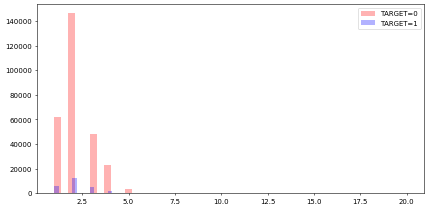

＜TARGET=0＞
count    282684.000000
mean          2.150154
std           0.906984
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64
------------------------------------------
＜TARGET=1＞
count    24825.000000
mean         2.181269
std          0.951327
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [41]:
#CNT_FAM_MEMBERS

df_fam_dropped = df.dropna(subset=['CNT_FAM_MEMBERS'])  #欠損行を削除

name = "CNT_FAM_MEMBERS"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df_fam_dropped.iloc[:][df_fam_dropped.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df_fam_dropped.iloc[:][df_fam_dropped.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df_fam_dropped.iloc[:][df_fam_dropped.TARGET == 0][name].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df_fam_dropped.iloc[:][df_fam_dropped.TARGET == 1][name].describe())

考察７）　家族の数

＊これも子供の数と傾向が同じである。ほとんど変わらないが、TARGET1の方が僅かに多い。

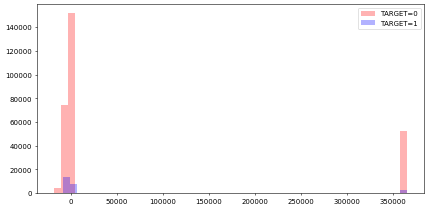

＜TARGET=０＞
count    282686.000000
mean      65696.146123
std      142877.810161
min      -17912.000000
25%       -2813.000000
50%       -1235.000000
75%        -278.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
------------------------------------------
＜TARGET=1＞
count     24825.000000
mean      42394.675448
std      119484.634253
min      -16069.000000
25%       -2156.000000
50%       -1034.000000
75%        -379.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


In [43]:
#DAYS_EMPLOYED
name = "DAYS_EMPLOYED"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df.iloc[:][df.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df.iloc[:][df.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()
print("＜TARGET=０＞")
print(df.iloc[:][df.TARGET == 0][name].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df.iloc[:][df.TARGET == 1][name].describe())

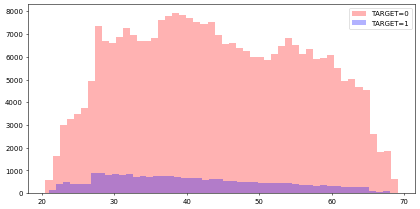

＜TARGET=0＞
count    282686.000000
mean         44.214182
std          11.956715
min          20.517808
25%          34.345205
50%          43.498630
75%          54.229452
max          69.120548
Name: DAYS_BIRTH, dtype: float64
------------------------------------------
＜TARGET=1＞
count    24825.000000
mean        40.780351
std         11.487245
min         21.035616
25%         31.221918
50%         39.128767
75%         49.416438
max         68.953425
Name: DAYS_BIRTH, dtype: float64


In [44]:
name = "DAYS_BIRTH"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df.iloc[:][df.TARGET == 0][name]/-365, bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df.iloc[:][df.TARGET == 1][name]/-365, bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

birth0 = df.query("TARGET == 0").DAYS_BIRTH / -365
birth1 = df.query("TARGET == 1").DAYS_BIRTH / -365
print("＜TARGET=0＞")
print(birth0.describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(birth1.describe())

考察８）顧客の年齢

顧客の年齢は違いが比較的わかりやすい。ばらつきはそれほど変わらないが、TARGET1の方が若年層寄りである。

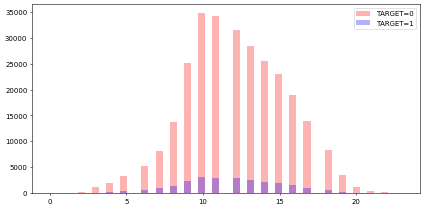

＜TARGET=0＞
count    282686.000000
mean         12.086807
std           3.263173
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64
------------------------------------------
＜TARGET=1＞
count    24825.000000
mean        11.797100
std          3.284299
min          0.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


In [45]:
#HOUR_APPR_PROCESS_START
name = "HOUR_APPR_PROCESS_START"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df.iloc[:][df.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df.iloc[:][df.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()
print("＜TARGET=0＞")
print(df.iloc[:][df.TARGET == 0][name].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df.iloc[:][df.TARGET == 1][name].describe())

考察９）相談開始時間

ほとんど変わりはない。TARGET1の方が平均で20分ぐらい早い。

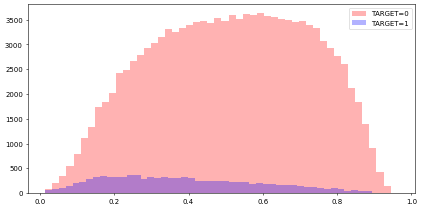

＜TARGET=0＞
count    124079.000000
mean          0.511461
std           0.208804
min           0.014568
25%           0.345430
50%           0.517452
75%           0.682839
max           0.962693
Name: EXT_SOURCE_1, dtype: float64
------------------------------------------
＜TARGET=1＞
count    10054.000000
mean         0.386968
std          0.204729
min          0.014691
25%          0.221847
50%          0.361675
75%          0.537508
max          0.929394
Name: EXT_SOURCE_1, dtype: float64


In [46]:
#EXT_SOURCE_1
df_ext1_dropped = df.dropna(subset=['EXT_SOURCE_1'])  #欠損行を削除

name = "EXT_SOURCE_1"

plt.figure(figsize=(10,5), dpi=50)
plt.hist(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 0][name].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 1][name].describe())

考察１０）ローン年金の額

ローン年金の額もTARGET0がやや多い傾向

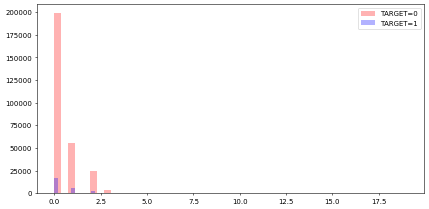

＜TARGET=0＞
count    282686.000000
mean          0.412946
std           0.718843
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
------------------------------------------
＜TARGET=1＞
count    24825.000000
mean         0.463807
std          0.756903
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         11.000000
Name: CNT_CHILDREN, dtype: float64


In [47]:
#CNT_CHILDREN
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df.iloc[:][df.TARGET == 0]["CNT_CHILDREN"], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df.iloc[:][df.TARGET == 1]["CNT_CHILDREN"], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df.iloc[:][df.TARGET == 0]["CNT_CHILDREN"].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df.iloc[:][df.TARGET == 1]["CNT_CHILDREN"].describe())

考察１１）所有車の年数

TARGET0の顧客の方が新しい車を保有している傾向

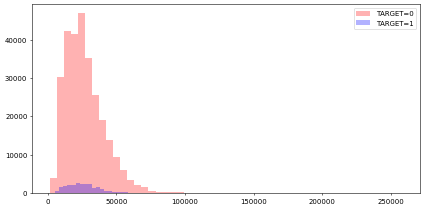

＜TARGET=0＞
count    282674.000000
mean      27163.623349
std       14658.307178
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
------------------------------------------
＜TARGET=1＞
count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64


In [50]:
#AMT_ANNUITY
df_ann_dropped = df.dropna(subset=['AMT_ANNUITY'])  #欠損行を削除

name = "AMT_ANNUITY"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df_ann_dropped.iloc[:][df_ann_dropped.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df_ann_dropped.iloc[:][df_ann_dropped.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df_ann_dropped.iloc[:][df_ann_dropped.TARGET == 0]["AMT_ANNUITY"].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df_ann_dropped.iloc[:][df_ann_dropped.TARGET == 1]["AMT_ANNUITY"].describe())

考察１２）ローン


信用力の高い人ほど多く借りられる可能性

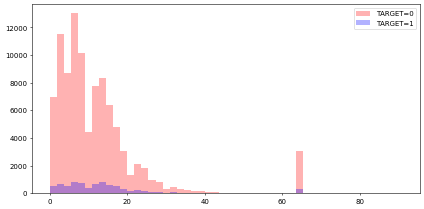

＜TARGET=0＞
count    97006.000000
mean        11.935540
std         11.891359
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         91.000000
Name: OWN_CAR_AGE, dtype: float64
------------------------------------------
＜TARGET=1＞
count    7576.000000
mean       13.668691
std        12.499074
min         0.000000
25%         6.000000
50%        11.000000
75%        17.000000
max        91.000000
Name: OWN_CAR_AGE, dtype: float64


In [52]:
#OWN_CAR_AGEのばらつき

df_car_dropped = df.dropna(subset=['OWN_CAR_AGE'])  #欠損行を削除

name = "OWN_CAR_AGE"
plt.figure(figsize=(10,5), dpi=50)
plt.hist(df_car_dropped.iloc[:][df_car_dropped.TARGET == 0][name], bins=50, color='r', alpha=0.3, label="TARGET=0")
plt.hist(df_car_dropped.iloc[:][df_car_dropped.TARGET == 1][name], bins=50, color='b', alpha=0.3, label="TARGET=1")
plt.legend()
plt.show()

print("＜TARGET=0＞")
print(df_car_dropped.iloc[:][df_car_dropped.TARGET == 0]["OWN_CAR_AGE"].describe())
print("------------------------------------------")
print("＜TARGET=1＞")
print(df_car_dropped.iloc[:][df_car_dropped.TARGET == 1]["OWN_CAR_AGE"].describe())

考察１３）

ターゲットと相関の高そうな特徴量同士の散布図を、ラベルを分けて作成.特に関係はわからなかった

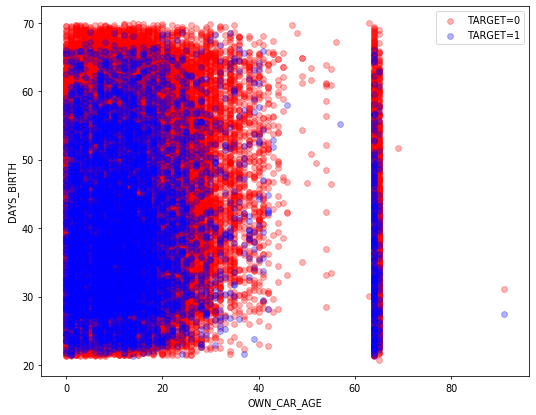

In [56]:
#OWN_CAR_AGEとDAYS_BIRTH
df_car_dropped = df.dropna(subset=['OWN_CAR_AGE'])  #欠損行を削除

name1 = "OWN_CAR_AGE"
name2 = "DAYS_BIRTH"
plt.figure(figsize=(9,7), dpi=70)
plt.scatter(df_car_dropped.iloc[:][df_car_dropped.TARGET == 0][name1],
            df_car_dropped.iloc[:][df_car_dropped.TARGET == 0][name2]/-360,
            color='r', alpha=0.3, label="TARGET=0")
plt.scatter(df_car_dropped.iloc[:][df_car_dropped.TARGET == 1][name1],
            df_car_dropped.iloc[:][df_car_dropped.TARGET == 1][name2]/-360,
            color='b', alpha=0.3, label="TARGET=1")
plt.xlabel(name1)
plt.ylabel(name2)
plt.legend()
plt.show()

考察１4）

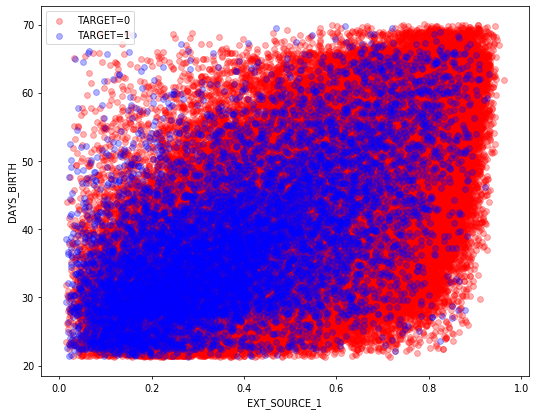

In [61]:
#DAYS_BIRTHとEXT_SOURCE_1
df_ext1_dropped = df.dropna(subset=['EXT_SOURCE_1'])  #欠損行を削除

name1 = "EXT_SOURCE_1"
name2 = "DAYS_BIRTH"
plt.figure(figsize=(9,7), dpi=70)
plt.scatter(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 0][name1],
            df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 0][name2]/-360,
            color='r', alpha=0.3, label="TARGET=0")
plt.scatter(df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 1][name1],
            df_ext1_dropped.iloc[:][df_ext1_dropped.TARGET == 1][name2]/-360,
            color='b', alpha=0.3, label="TARGET=1")
plt.xlabel(name1)
plt.ylabel(name2)
plt.legend()
plt.show()

In [62]:
考察１5）

SyntaxError: invalid character in identifier (<ipython-input-62-4742fe2b7ab3>, line 1)

In [ ]:
#OWN_CAR_AGEとDAYS_BIRTHを掛け合わせる

df_CE_dropped = df_car_dropped.dropna(subset=['EXT_SOURCE_1'])  #欠損値処理
df_CE_dropped = df_CE_dropped.reset_index(drop=True)

Car_Birth_0 = (df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 0]["OWN_CAR_AGE"]
               * (df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 0]["DAYS_BIRTH"]/-365))

Car_Birth_1 = (df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 1]["OWN_CAR_AGE"]
               * (df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 1]["DAYS_BIRTH"]/-365))


name1 = "EXT_SOURCE_1"
plt.figure(figsize=(9,7), dpi=70)
plt.scatter(df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 0][name1],
            Car_Birth_0,
            color='r', alpha=0.3, label="TARGET=0")
plt.scatter(df_CE_dropped.iloc[:][df_CE_dropped.TARGET == 1][name1],
            Car_Birth_1,
            color='b', alpha=0.3, label="TARGET=1")
plt.xlabel(name1)
plt.ylabel("OWN_CAR_AGE * DAYS_BIRTH")
plt.legend()
plt.show()